# Simulação dos Experimentos de Crescimento de Interfaces Exemplificados no Capítulo 2 de MATTOS (2005)

In [20]:
# Instanciacao dos modelos de simulação

from deposicao import DeposicaoAleatoria, DeposicaoAleatoriaRelaxacaoSuperficial, DeposicaoBalistica
from rng import RNG_PCG
import numpy as np

import sys
from simulacao_utils import plotar_interface, plotar_instantaneos

rng = RNG_PCG()

## Deposição Aleatória

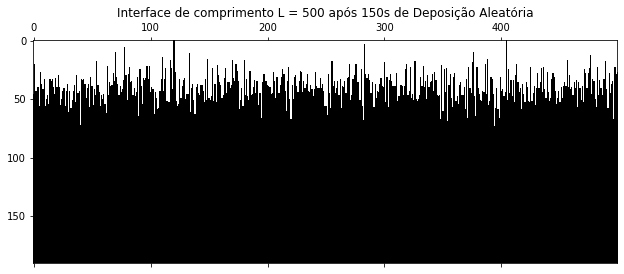

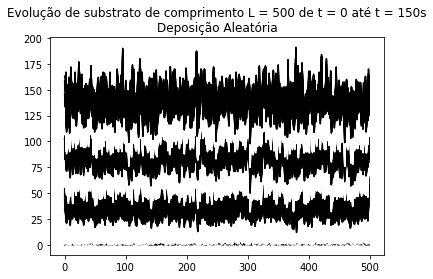

In [3]:
%matplotlib inline

import numpy as np

t_comutacao = 25
da = DeposicaoAleatoria(0, 500, rng, tempo_maximo = 150)
interface_da = da.construir_interface()
interface_da = np.rot90(np.rot90(interface_da))

plotar_interface('Interface de comprimento L = 500 após 150s de Deposição Aleatória',
                 interface_da)

plotar_instantaneos('Evolução de substrato de comprimento L = 500 de t = 0 até t = 150s\n'
                  + 'Deposição Aleatória',
                    [da.altura_sitio(i) for i in range(da.L)],
                    [[da.altura_sitio(i, t) for i in range(da.L)] for t in range(da.tempo_maximo)],
                    t_comutacao = t_comutacao)
del(da)

## Deposição Aleatória com Relaxação Superficial

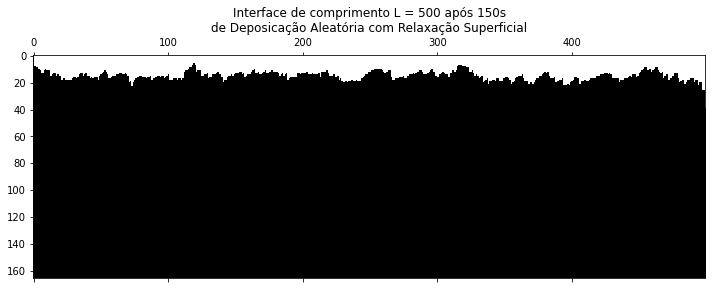

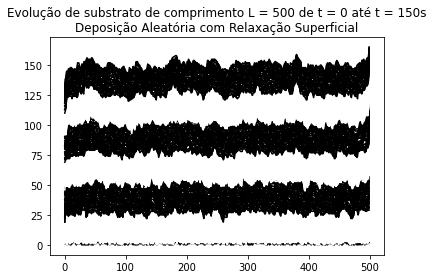

In [3]:
%matplotlib inline

import numpy as np

dars = DeposicaoAleatoriaRelaxacaoSuperficial(1, 500, rng, tempo_maximo = 150)

t_comutacao = 25

interface_dars = dars.construir_interface()
interface_dars = np.rot90(np.rot90(interface_dars))

plotar_interface('Interface de comprimento L = 500 após 150s\n'
               + 'de Deposicação Aleatória com Relaxação Superficial',
                 interface_dars)

plotar_instantaneos('Evolução de substrato de comprimento L = 500 de t = 0 até t = 150s\n'
                  + 'Deposição Aleatória com Relaxação Superficial',
                    [dars.altura_sitio(i) for i in range(dars.L)],
                    [[dars.altura_sitio(i, t) for i in range(dars.L)] for t in range(dars.tempo_maximo)],
                    t_comutacao = t_comutacao)

## Deposição Balística

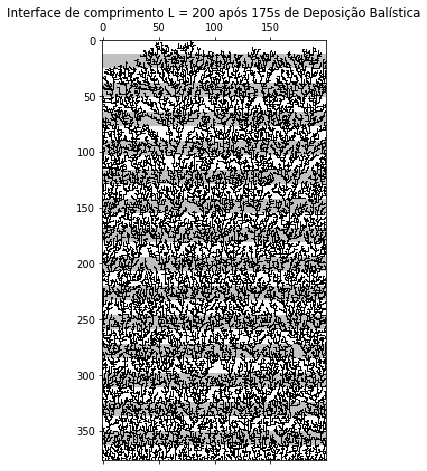

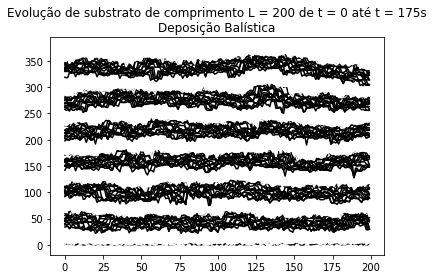

In [21]:
import numpy as np
import pdb
from matplotlib.colors import ListedColormap
import matplotlib._color_data as mcd

%matplotlib inline

db = DeposicaoBalistica(2, 200, rng, tempo_maximo = 175)

interface_db = np.int32(db.construir_interface())
interface_db = np.rot90(np.rot90(interface_db))

# preparar contraste da deposicao a cada 2500 particulas
comutar = False
particulas = 0
for i in range(interface_db.shape[0]):
    if comutar:
        interface_db[i] += 2
    particulas += 200
    if particulas > 2500:
        particulas = 0
        comutar = not comutar

titulo = 'Interface de comprimento L = 200 após 175s de Deposição Balística'
plotar_interface(titulo,
                 interface_db, cmap = ListedColormap(['white', 'black', 'silver', 'black']))

t_comutacao = 14
plotar_instantaneos('Evolução de substrato de comprimento L = 200 de t = 0 até t = 175s\n'
                  + 'Deposição Balística',
                    [db.altura_sitio(i) for i in range(db.L)],
                    [[db.altura_sitio(i, t) for i in range(db.L)] for t in range(db.tempo_maximo)],
                    t_comutacao = t_comutacao)